In [21]:
#%%
"""
Created on Thu Jan 16 2019
Pricing of Cash-or-Nothing options with the COS method
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum

In [22]:
def DigitalPayoffValuation(S,T,r,payoff):
    # S is a vector of Monte Carlo samples at T
    return np.exp(-r*T) * np.mean(payoff(S))

def GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])

    # Euler Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0

    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]

        S1[:,i+1] = S1[:,i] + r * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i])
        time[i+1] = time[i] +dt

    # Retun S1 and S2
    paths = {"time":time,"S":S1}
    return paths

def UpAndOutBarrier(S,T,r,payoff,Su):

    # handling of a barrier
    n1,n2 = S.shape
    barrier= np.zeros([n1,n2]) + Su

    hitM = S > barrier
    hitVec = np.sum(hitM, 1)
    hitVec = (hitVec == 0.0).astype(int)

    V_0 = np.exp(-r*T) * np.mean(payoff(S[:,-1]*hitVec))


    return V_0

def mainCalculation():
    NoOfPaths = 10000
    NoOfSteps = 250

    S0    = 100.0
    r     = 0.05
    T    = 5
    sigma = 0.2

    paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S0)
    S_paths= paths["S"]
    S_T = S_paths[:,-1]

    # Payoff setting
    K  = 100.0
    K2 = 140.0

    # Payoff specification
    payoff = lambda S: np.maximum(S-K,0.0)# - np.maximum(S-K2,0)

    #Plot
    S_T_grid = np.linspace(50,S0*1.5,200)

    plt.figure(1)
    plt.plot(S_T_grid,payoff(S_T_grid))

    # Valuation
    val_t0 = DigitalPayoffValuation(S_T,T,r,payoff)
    print("Value of the contract at t0 ={0}".format(val_t0))

Value of the contract at t0 =29.14368951730241


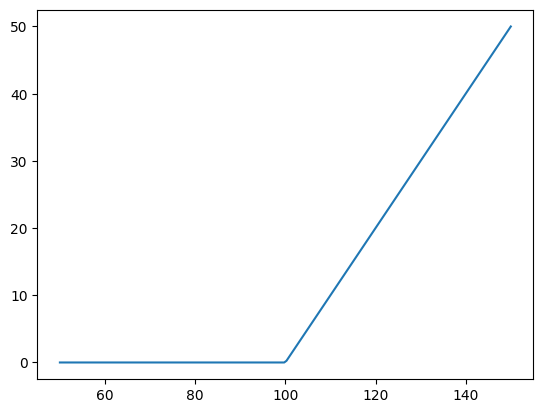

In [23]:
mainCalculation()

In [24]:
def DigitalPayoffValuation(S,T,r,payoff):
    # S is a vector of Monte Carlo samples at T
    return np.exp(-r*T) * np.mean(payoff(S))

def GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])

    # Euler Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0

    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]

        S1[:,i+1] = S1[:,i] + r * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i])
        time[i+1] = time[i] +dt

    # Retun S1 and S2
    paths = {"time":time,"S":S1}
    return paths

def UpAndOutBarrier(S,T,r,payoff,Su):

    # handling of a barrier
    n1,n2 = S.shape
    barrier= np.zeros([n1,n2]) + Su

    hitM = S > barrier
    hitVec = np.sum(hitM, 1)
    hitVec = (hitVec == 0.0).astype(int)

    V_0 = np.exp(-r*T) * np.mean(payoff(S[:,-1]*hitVec))


    return V_0

def mainCalculation():
    NoOfPaths = 10000
    NoOfSteps = 250

    S0    = 100.0
    r     = 0.05
    T    = 5
    sigma = 0.2
    

    paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S0)
    S_paths= paths["S"]
    S_T = S_paths[:,-1]

    # Payoff setting
    K  = 100.0
    K2 = 140.0

    # Payoff specification
    payoff = lambda S: np.maximum(S-K,0.0) - np.maximum(S-K2,0)

    #Plot
    S_T_grid = np.linspace(50,S0*1.5,200)

    plt.figure(1)
    plt.plot(S_T_grid,payoff(S_T_grid))

    # Valuation
    val_t0 = DigitalPayoffValuation(S_T,T,r,payoff)
    print("Value of the contract at t0 ={0}".format(val_t0))

Value of the contract at t0 =14.915237903450622


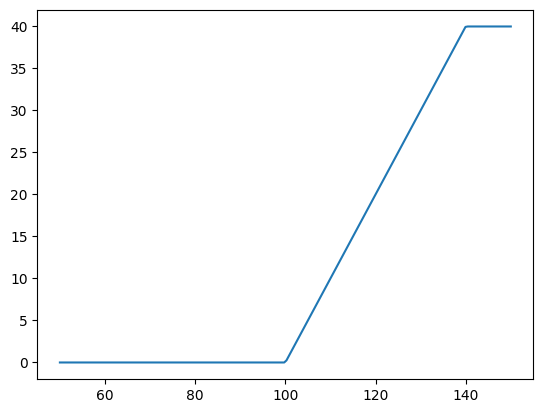

In [25]:
mainCalculation()

In [26]:
def DigitalPayoffValuation(S,T,r,payoff):
    # S is a vector of Monte Carlo samples at T
    return np.exp(-r*T) * np.mean(payoff(S))

def GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S_0):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])

    # Euler Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:,0] =S_0

    time = np.zeros([NoOfSteps+1])

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]

        S1[:,i+1] = S1[:,i] + r * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i])
        time[i+1] = time[i] +dt

    # Retun S1 and S2
    paths = {"time":time,"S":S1}
    return paths

def UpAndOutBarrier(S,T,r,payoff,Su):

    # handling of a barrier
    n1,n2 = S.shape
    barrier= np.zeros([n1,n2]) + Su

    hitM = S > barrier
    hitVec = np.sum(hitM, 1)
    hitVec = (hitVec == 0.0).astype(int)

    V_0 = np.exp(-r*T) * np.mean(payoff(S[:,-1]*hitVec))


    return V_0

def mainCalculation():
    NoOfPaths = 10000
    NoOfSteps = 250

    S0    = 100.0
    r     = 0.05
    T    = 5
    sigma = 0.2
    Su = 150

    paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S0)
    S_paths= paths["S"]
    S_T = S_paths[:,-1]

    # Payoff setting
    K  = 100.0
    K2 = 140.0

    # Payoff specification
    payoff = lambda S: np.maximum(S-K,0.0)# - np.maximum(S-K2,0)

    #Plot
    S_T_grid = np.linspace(50,S0*1.5,200)

    plt.figure(1)
    plt.plot(S_T_grid,payoff(S_T_grid))

    # Valuation
    val_t0 = DigitalPayoffValuation(S_T,T,r,payoff)
    print("Value of the contract at t0 ={0}".format(val_t0))

    # barrier pricing
    barrier_price = UpAndOutBarrier(S_paths,T,r,payoff,Su)

    print("Value of the barrier contract at t0 ={0}".format(barrier_price))

Value of the contract at t0 =29.124953202184756
Value of the barrier contract at t0 =2.676781638977923


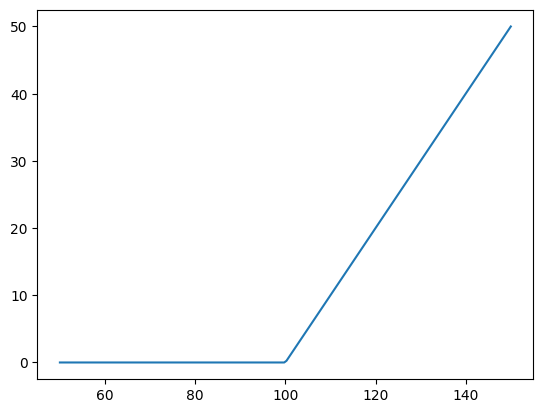

In [27]:
mainCalculation()